# <center>Electrical Energy prediction of Power Plant

**In this project**
- applying keras seqential model
- visulaizing the loss and val loss through 100 epoch

**Link of datasets**
- https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#------------------sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#from sklearn.preprocessing import tra
#-------------- tensorflow- keras
from tensorflow import keras
#import model
from keras.models import Sequential
# import the layers
from keras.layers import Dense

In [2]:
df=pd.read_excel("Folds5x2_pp.xlsx")
print(df.shape)
df.head(3)

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


### Exploratory Data Analysis
- check for **Missing** values
- check statics for **numerical features**
- labeling **categorical features**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
# checking for missing values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
# check for categorical features
for i in df.columns:
    if df[i].dtypes=="object":
        cat.append(i)
        print(i,len(set(df[i])))

In [6]:
(df < 0).values.any()

False

In [7]:
# statistical representation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


<AxesSubplot:>

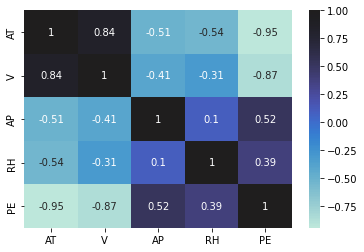

In [8]:
# Correlation
sns.heatmap(df.corr(),center=True,annot=True)

In [9]:
# separion Features and Target matrix
X=df.drop(["PE"],axis=1).values
y=df["PE"].values

In [10]:
# Separting traing testing validating sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=40)
print(df.shape,X_train.shape, X_test.shape)

(9568, 5) (7654, 4) (1914, 4)


In [11]:
# scalling
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.min(),X_train.max())

0.0 1.0000000000000002


### Building Neural Network Model
- Building Arcitucture
    - sequential model
    - hidden layers
    - output layer
    - activation function
- Model compile
- Model traning

In [12]:
model=Sequential()
model.add(Dense(6,activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer="adam",
             loss="mean_squared_error",
             metrics=["accuracy"])
print(model.loss)# print the type of loss function

mean_squared_error


In [14]:
model.fit(X_train,y_train,
          epochs=100,
          batch_size = 32,
          verbose=1,
         validation_data=(X_test,y_test))

Epoch 1/100
240/240 [==============================] - 2s 4ms/step - loss: 204770.7656 - accuracy: 0.0000e+00 - val_loss: 200815.6562 - val_accuracy: 0.0000e+00
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 186337.2969 - accuracy: 0.0000e+00 - val_loss: 166544.9219 - val_accuracy: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 135135.2188 - accuracy: 0.0000e+00 - val_loss: 100846.9766 - val_accuracy: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 66667.9141 - accuracy: 0.0000e+00 - val_loss: 37039.5664 - val_accuracy: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 19438.1250 - accuracy: 0.0000e+00 - val_loss: 8325.8066 - val_accuracy: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 4999.0752 - accuracy: 0.0000e+00 - val_loss: 3506.7012 - val_accuracy: 0.0000e+00
Epoch 7/100
240/240 [======================

240/240 [==============================] - 1s 2ms/step - loss: 160.5905 - accuracy: 0.0000e+00 - val_loss: 160.6530 - val_accuracy: 0.0000e+00
Epoch 54/100
240/240 [==============================] - 1s 2ms/step - loss: 145.4344 - accuracy: 0.0000e+00 - val_loss: 145.1521 - val_accuracy: 0.0000e+00
Epoch 55/100
240/240 [==============================] - 1s 2ms/step - loss: 130.3383 - accuracy: 0.0000e+00 - val_loss: 131.1453 - val_accuracy: 0.0000e+00
Epoch 56/100
240/240 [==============================] - 1s 3ms/step - loss: 117.0321 - accuracy: 0.0000e+00 - val_loss: 116.9466 - val_accuracy: 0.0000e+00
Epoch 57/100
240/240 [==============================] - 1s 3ms/step - loss: 104.4672 - accuracy: 0.0000e+00 - val_loss: 104.5422 - val_accuracy: 0.0000e+00
Epoch 58/100
240/240 [==============================] - 1s 3ms/step - loss: 92.9945 - accuracy: 0.0000e+00 - val_loss: 93.2347 - val_accuracy: 0.0000e+00
Epoch 59/100
240/240 [==============================] - 1s 2ms/step - loss: 82.

In [15]:
print(model.history.history.keys())
model_loss=pd.DataFrame(model.history.history)
model_loss.head()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


,loss,accuracy,val_loss,val_accuracy
0,204770.765625,0.0,200815.656250,0.0
1,186337.296875,0.0,166544.921875,0.0
2,135135.218750,0.0,100846.976562,0.0
3,66667.914062,0.0,37039.566406,0.0
4,19438.125000,0.0,8325.806641,0.0


<AxesSubplot:>

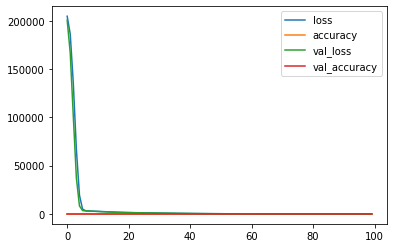

In [16]:
model_loss.plot()